# Example of how to use cira with scikit-learn 

understand that this is just an example and not a good model for actual trading.

In this example we will setup cira and use Liner Regression as an model and try to make prediction on a crypto asset. 

### Cira setup

In [1]:
import cira

In [2]:
cira.auth.KEY_FILE = "../alpc_key.json"
assert cira.auth.check_keys(), "the set keys dose not work"

### Fetching data 

In [3]:
from datetime import datetime

SYMBOL = "SPY"

cry = cira.Stock(SYMBOL)    

start = datetime(2020, 7, 1)
end = datetime(2023, 7, 1)

data = cry.historical_data_df(start_date=start, end_date=end)
data.head()

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-07-01 04:00:00+00:00,SPY,309.54,311.89,309.07,310.57,72474858.0,418495.0,310.486119
2020-07-02 04:00:00+00:00,SPY,314.24,315.70,311.51,312.19,69344217.0,433527.0,313.315661
2020-07-06 04:00:00+00:00,SPY,316.37,317.68,315.56,317.01,61713828.0,331248.0,316.169274
2020-07-07 04:00:00+00:00,SPY,315.38,317.52,313.37,313.77,82909978.0,398769.0,315.437016
2020-07-08 04:00:00+00:00,SPY,314.61,316.30,312.70,316.16,54638669.0,325899.0,314.892715


### Machine learning

training the model 

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


train_data = data.iloc[:int(len(data)*0.8)]
test_data =  data.iloc[int(len(data)*0.8):]

X = train_data[["open", "high", "low"]]
y = train_data['close']

X_test = test_data[["open", "high", "low"]]
y_test = test_data["close"] 

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.757409326670164


using the models predictions

In [5]:
import matplotlib.pyplot as plt
from cira.sizer import PositionSizer
from cira.backtest import model_vs_buy_and_hold

diff: 1.1345800622631301
model profit: 2070$


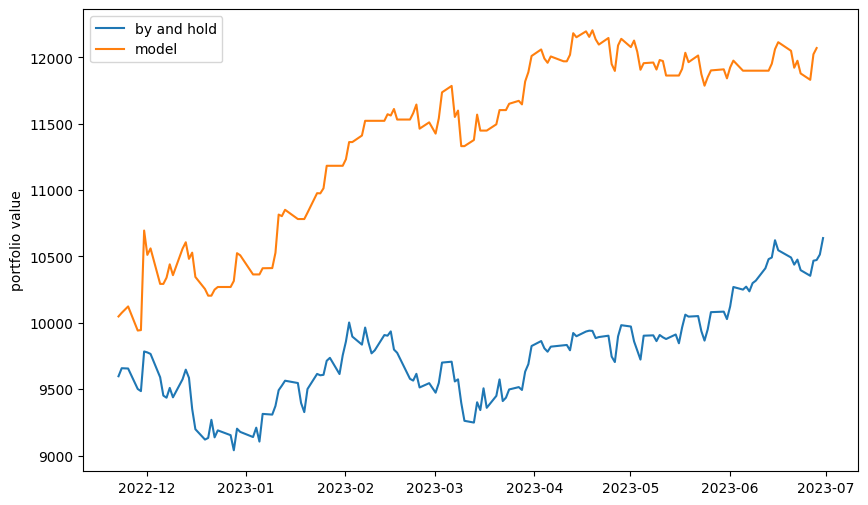

In [34]:

INITIAL_CAPITAL = 10_000.0
THRESHOLD = 0.001
RISK = 0.3
STOP_LOSS = test_data["close"].values[0] * 0.8
MAX_POS_SIZE = 30

FEATURES = ["open", "high", "low"]
TARGET = "close"

sizer = PositionSizer(RISK, STOP_LOSS, max_position_size=MAX_POS_SIZE)
bh, res = model_vs_buy_and_hold(model, sizer, test_data, FEATURES, TARGET, threshold=THRESHOLD, capital=INITIAL_CAPITAL)




bh_end = bh["capital"].values[-1]
model_end = res['capital'].values[-1]
print(f"diff: {model_end / bh_end}")
print(f"model profit: {int(model_end - INITIAL_CAPITAL)}$")




plt.figure(figsize=(10,6))
plt.plot(bh, label="by and hold")
plt.plot(res.index, res["capital"], label="model")
plt.ylabel("portfolio value")
plt.legend()

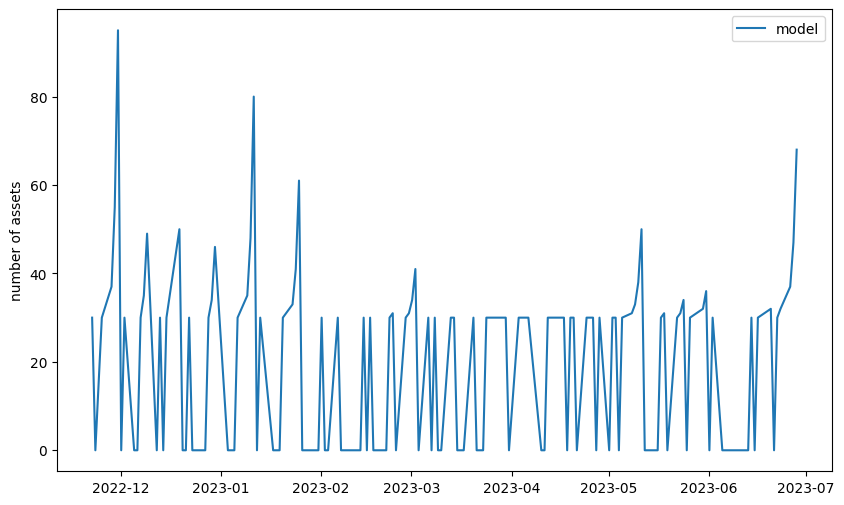

In [35]:

plt.figure(figsize=(10,6))
plt.plot(res.index, res["allocation"], label="model")
plt.ylabel("number of assets")
plt.legend()